In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

In [1]:
autos = pd.read_csv('./curados/para_class.csv')

NameError: name 'pd' is not defined

In [14]:
autos.groupby('tramite_tipo')['tramite_fecha'].count()

tramite_tipo
COMUNICACIÓN DE RECUPERO     2967
DENUNCIA DE ROBO O HURTO    60750
Name: tramite_fecha, dtype: int64

In [15]:
autos.isnull().sum()

tramite_tipo                        0
tramite_fecha                       0
fecha_inscripcion_inicial           2
registro_seccional_descripcion      0
registro_seccional_provincia        0
automotor_origen                    0
automotor_anio_modelo             302
automotor_tipo_descripcion          0
automotor_marca_descripcion         0
automotor_uso_descripcion           2
titular_tipo_persona                0
titular_domicilio_localidad        88
titular_domicilio_provincia         0
titular_genero                      0
titular_anio_nacimiento            28
titular_pais_nacimiento             0
titular_porcentaje_titularidad      0
unico_duenio                        0
dtype: int64

In [32]:
#dropear todas las rows que tengan nulls
autos.dropna(axis= 0, inplace= True)

In [17]:
autos.shape

(63298, 18)

In [18]:
autos.groupby('tramite_tipo')['tramite_fecha'].count()

tramite_tipo
COMUNICACIÓN DE RECUPERO     2931
DENUNCIA DE ROBO O HURTO    60367
Name: tramite_fecha, dtype: int64

In [33]:
y = autos.iloc[:,0]

In [34]:
x = autos.iloc[:,1:]

In [35]:
x.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'registro_seccional_descripcion', 'titular_domicilio_localidad', 'titular_domicilio_provincia', 'titular_porcentaje_titularidad'], axis= 1, inplace = True)

In [47]:
# para esta prueba, dropear todo lo que tenga muchas categorias
x.drop(['automotor_tipo_descripcion', 'automotor_marca_descripcion'], axis = 1, inplace= True)

In [51]:
#x.groupby('automotor_marca_descripcion')['automotor_origen'].count().sort_values(ascending= False)[0:30]


In [27]:
#sns.pairplot(x)

In [75]:
# "le" es el label encoder que transforma las etiquetas de string a INT.
le = preprocessing.LabelEncoder()
# sobre-escribo el vector "y" con las etiquetas numericas obtenidas del label encoder
y=le.fit_transform(y)

In [65]:
prov_dummie= pd.get_dummies(autos.registro_seccional_provincia)
prov_dummie.head(3)

,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Bs.As.,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x.head()

,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio
0,Buenos Aires,Nacional,2000.0,Privado,Física,Masculino,1981.0,ARGENTINA,1
1,Buenos Aires,Nacional,2007.0,Privado,Física,Femenino,1990.0,ARGENTINA,1
2,Buenos Aires,Nacional,1995.0,Privado,Física,Masculino,1986.0,ARGENTINA,1
3,Buenos Aires,Nacional,1999.0,Privado,Física,No identificado,1964.0,NO IDENTIFICADO,1
4,Buenos Aires,Nacional,2006.0,Privado,Física,Femenino,1961.0,ARGENTINA,1


In [58]:
origen_dummie= pd.get_dummies(autos.automotor_origen)
#origen_dummie.head(3)

In [55]:
uso_dummie= pd.get_dummies(autos.automotor_uso_descripcion)
#uso_dummie.head(3)

In [64]:
pais_tit_dummie = pd.get_dummies(autos.titular_pais_nacimiento)
#pais_tit_dummie.head(3)

In [56]:
autos.titular_tipo_persona.unique()

array(['Física', 'Jurídica'], dtype=object)

In [59]:
x['titular_pers_fisica'] = np.where(x['titular_tipo_persona'] == 'Física', 1, 0)

In [60]:
x['titular_masculino'] = np.where(x['titular_genero'] == 'Masculino', 1, 0)

In [66]:
x = x.join([prov_dummie, origen_dummie, uso_dummie, pais_tit_dummie])

In [67]:
x.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion', 'titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [68]:
x

,automotor_anio_modelo,titular_anio_nacimiento,unico_duenio,titular_pers_fisica,titular_masculino,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Bs.As.,...,REPUBLICA DOMINICANA,RUSIA,SENEGAL,SIRIA,SUIZA,TURQUIA,UCRANIA,URUGUAY,VENEZUELA,YUGOESLAVIA
0,2000.0,1981.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007.0,1990.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995.0,1986.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1999.0,1964.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,1961.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63712,2006.0,1999.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63713,2010.0,1991.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63714,1999.0,1972.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63715,2007.0,1974.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [100]:
neigh = KNeighborsClassifier(n_neighbors=8)

In [101]:
neigh.fit(xtrain, ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [102]:
ypred = neigh.predict(xtest)

In [103]:
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9686571879936808


In [104]:
yproba = neigh.predict_proba(xtest)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.7744866501374562


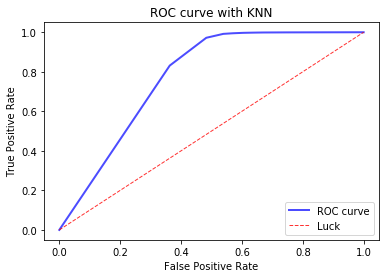

In [105]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

In [110]:
cm = confusion_matrix(ytest, ypred)
cm

array([[  315,   418],
       [   78, 15014]], dtype=int64)

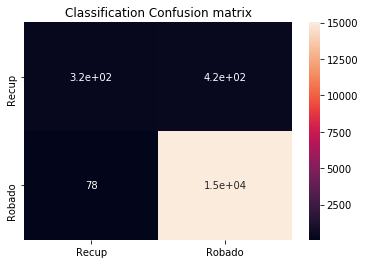

In [112]:
df_cm = pd.DataFrame(cm, index = ['Recup', 'Robado'], columns = ['Recup', 'Robado'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [97]:
iteraciones_knn = 50
# creo un vector de 50 posiciones para guardar los resultados de accuracy.
acc_knn = np.zeros(iteraciones_knn)

In [98]:
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain,ytrain)
    # calculo la prediccion
    ypred_knn = neigh.predict(xtest)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

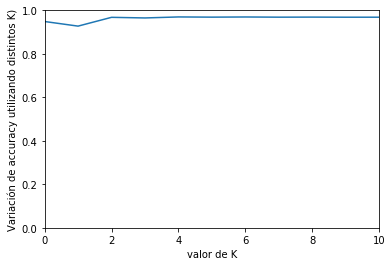

In [109]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
plt.ylim(0,1)
plt.xlim(0,10)
plt.show()

In [113]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)

In [ ]:
clf.fit(xtrain,ytrain)